## Explore the concepts assets and frames

### Import packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [4]:
df = pd.read_json("../data/concepts.json")

In [5]:
df.describe()

,concept,implementation,explanation,asset_suggestions
count,115,115,115,115
unique,99,111,103,103
top,The ad begins with a captivating image of the ...,{'frame_1': {'description': 'The ad opens with...,This concept aligns with Adludio's brand ident...,[{'frame_1': {'Background Animation': 'A suspe...
freq,5,5,5,13


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   concept            115 non-null    object
 1   implementation     115 non-null    object
 2   explanation        115 non-null    object
 3   asset_suggestions  115 non-null    object
dtypes: object(4)
memory usage: 3.7+ KB


In [11]:
df.columns

Index(['concept', 'implementation', 'explanation', 'asset_suggestions'], dtype='object')

### Extract all the interaction types of the implementation

In [38]:
# Extract all implementation types
implementation_types = set()

for index, row in df.iterrows():
    implementation = row['implementation']
    # print(list(implementation.items()))
    # break
    for frame, details in list(implementation.items()):
        # print(details)
        if "interaction_type" in details and details['interaction_type']:
            implementation_types.add(details['interaction_type'])
        # else:
            # print(details)

print("All interaction types:", implementation_types)

All interaction types: {'Tap', 'Tap and Hold', 'Drag and Drop', 'Swipe', 'Choice Selection', 'None'}


In [54]:
len(implementation_types)

6

### Extract all asset category types

In [65]:
from collections import defaultdict


asset_categories = defaultdict(int)
for suggestions in df['asset_suggestions']:
    for frames in suggestions:
        for frame in frames:
            if frame != "explanation":
                for key in frames[frame].keys():
                    asset_categories[key] += 1


asset_categories = sorted(asset_categories.items(), reverse=True, key=lambda x:x[1])
print(asset_categories)

[('Background', 530), ('Interactive Element', 340), ('Logo', 287), ('Product Image', 251), ('CTA', 231), ('Text', 184), ('Headline Text', 159), ('Background Image', 146), ('Brand Logo', 117), ('Text Overlay', 77), ('Foreground', 71), ('Animation', 61), ('CTA Button', 54), ('Interaction', 39), ('Engagement Text', 37), ('Engagement Visual', 33), ('Product Close-up', 28), ('Tagline', 26), ('Swipe Indicator', 25), ('CTA Text', 24), ('Interactive Elements', 24), ('Overlay Text', 21), ('Interactive Text', 18), ('Product Feature Highlight', 17), ('Background Animation', 16), ('Main Character', 16), ('Voiceover', 15), ('Product', 15), ('Main Visual', 15), ('Main Product', 15), ('Countdown Timer', 13), ('Video Clips', 13), ('Toolbox', 13), ('Sound Effects', 13), ('Ending Scene', 13), ('Animated Cat', 13), ('Product Highlight', 12), ('Special Offer', 12), ('Adludio Logo', 12), ('Interactive Prompt', 12), ('Image Gallery', 12), ('Main Focus', 12), ('Interactive Button', 11), ('Product Video', 10)

In [67]:
len(asset_categories)

241

### Visualize the top 10 categories of asset

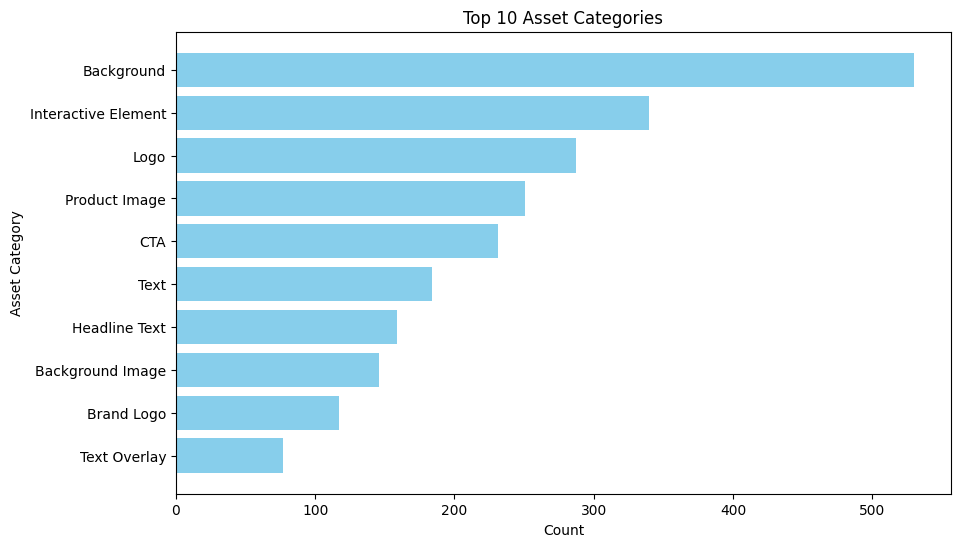

In [68]:
# Extract top 10 categories
top_10_categories = asset_categories[:10]

# Extract category names and counts for plotting
categories = [category[0] for category in top_10_categories]
counts = [category[1] for category in top_10_categories]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(categories, counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Asset Category')
plt.title('Top 10 Asset Categories')
plt.gca().invert_yaxis()  # Invert y-axis to display the category with highest count on top
plt.show()